In [1]:
import xarray as xr
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
dataset = pd.read_csv('/media/sany/SSD/Document/Project_research/Climate/ML_CYCLONE/Data/Full_data_Rifat.csv')
dataset

,index,Hours,lat,lon,min_msl,mean_msl,max_wind,lat+1,lat+2,lat+3,lat+4,lat+5,lon+1,lon+2,lon+3,lon+4,lon+5,lat+6,lon+6
0,1,0,6.75,86.50,99568.80469,100413.9922,17.309776,6.75,6.75,6.75,6.75,6.75,86.25,86.25,86.00,86.00,86.00,6.75,86.00
1,1,6,6.75,86.00,99776.70313,100643.5156,15.157084,6.75,6.75,6.75,6.75,6.75,85.75,86.00,86.00,86.00,86.00,6.50,86.00
2,1,12,6.50,86.00,99329.61719,100238.6250,19.080509,6.25,6.25,6.50,6.50,6.50,86.00,86.00,85.75,86.00,86.00,6.50,86.00
3,1,18,6.50,86.00,99475.76563,100549.6563,18.224230,6.75,6.75,7.00,7.25,7.50,86.00,86.25,86.50,86.50,86.25,7.75,86.25
4,1,24,7.75,86.25,99259.90625,100432.4531,17.803444,7.75,8.00,8.00,8.00,8.25,86.25,86.25,86.25,86.25,86.25,8.50,86.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,56,24,11.25,81.50,99176.17969,101009.4453,21.740412,11.50,11.50,11.50,11.75,11.75,81.25,81.25,81.25,81.25,81.00,11.75,81.00
763,56,30,11.75,81.00,99517.80469,101202.0000,21.605190,12.00,12.00,12.00,12.25,12.25,80.75,80.75,80.50,80.50,80.25,12.25,80.25
764,56,36,12.25,80.25,99467.61719,101127.5547,19.010506,12.50,12.50,12.50,12.50,12.75,80.00,80.25,80.25,80.00,80.00,12.75,80.00
765,56,42,12.75,80.00,99887.10938,101317.8438,19.993193,13.00,13.00,13.00,13.25,13.25,79.75,79.75,79.75,79.75,79.50,13.50,79.75


In [3]:
#select features and target
X = dataset.iloc[:,:17].values
Y = np.column_stack((dataset['lon+6'], dataset['lat+6']))

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='constant')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)
print("-----------------------------------------------------------------")
print(Y)

[[-1.74040547 -1.35253219 -2.39473219 ...  0.10517201  0.16680019
   0.1942914 ]
 [-1.74040547 -1.1609193  -2.39473219 ...  0.10517201  0.16680019
   0.1942914 ]
 [-1.74040547 -0.96930641 -2.45742237 ...  0.0887362   0.16680019
   0.1942914 ]
 ...
 [ 1.63037662 -0.20285485 -1.01554823 ... -0.2728515  -0.15417596
  -0.10167981]
 [ 1.63037662 -0.01124196 -0.89016786 ... -0.30572311 -0.16754997
  -0.12634407]
 [ 1.63037662  0.18037093 -0.70209732 ... -5.54874486 -4.433858
  -4.04796253]]
-----------------------------------------------------------------
[[86.    6.75]
 [86.    6.5 ]
 [86.    6.5 ]
 ...
 [80.   12.75]
 [79.75 13.5 ]
 [ 0.    0.  ]]


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

## ANN Model

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [8]:
print("X_train.shape, Y_train.shape, X_test.shape, Y_train.shape")
print(X_train.shape,Y_train.shape,X_test.shape,Y_train.shape)

X_train.shape, Y_train.shape, X_test.shape, Y_train.shape
(536, 17) (536, 2) (231, 17) (536, 2)


In [9]:
# Define model 
model = Sequential([
    tf.keras.Input((X_train.shape[1]),),
    Dense(units=100, kernel_regularizer=tf.keras.regularizers.l2(0.002), activation='relu', name='L1'),
    Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.002), activation='relu', name='L2'), 
    Dense(units=2, activation='linear', name='L3'),
], name='my_model')

In [10]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 100)               1800      
                                                                 
 L2 (Dense)                  (None, 50)                5050      
                                                                 
 L3 (Dense)                  (None, 2)                 102       
                                                                 
Total params: 6,952
Trainable params: 6,952
Non-trainable params: 0
_________________________________________________________________


In [11]:
[layer1, layer2, layer3] = model.layers

In [12]:
# Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")


W1 shape = (17, 100), b1 shape = (100,)
W2 shape = (100, 50), b2 shape = (50,)
W3 shape = (50, 2), b3 shape = (2,)


To change the binary classification to regression, you need to change the loss function and the output activation function. For regression, you can use mean squared error (MSE) or mean absolute error (MAE) as the loss function. You can also use Huber loss, which is less sensitive to outliers than MSE. You can change the loss function in the model.compile() function. For example, to use MSE as the loss function, you can use the following code:

model.compile(
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mean_absolute_error']
)
You can also use MAE as the loss function by replacing 'mean_squared_error' with 'mean_absolute_error'. For Huber loss, you can use the following code:

model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mean_absolute_error']
)
For the output activation function, you can use a linear activation function, which is the default activation function for regression problems. You don’t need to specify it explicitly.

I hope this helps! Let me know if you have any more questions.

In [13]:
# model compile and fit
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mean_absolute_error']
)

history = model.fit(X_train, Y_train, validation_split=0.33, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 47.6996 - mean_absolute_error: 47.9971 - val_loss: 46.3722 - val_mean_absolute_error: 46.6785
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 46.8794 - mean_absolute_error: 47.1856 - val_loss: 45.4707 - val_mean_absolute_error: 45.7764
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 45.7142 - mean_absolute_error: 46.0185 - val_loss: 44.0572 - val_mean_absolute_error: 44.3585
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 43.8579 - mean_absolute_error: 44.1560 - val_loss: 41.9316 - val_mean_absolute_error: 42.2226
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 41.1004 - mean_absolute_error: 41.3860 - val_loss: 39.0902 - val_mean_absolute_error: 39.3697
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 37.6894 - mean_absolute_error: 37.9525 - val_loss: 36.1713 - val_mean_absolute_error: 36.429

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


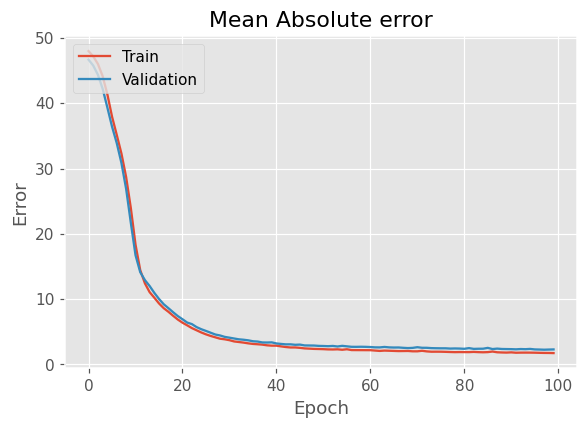

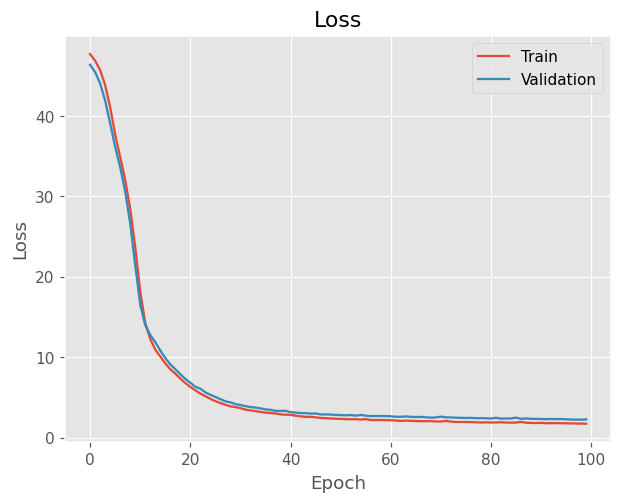

In [14]:
print(history.history.keys())

# summarize history for accuracy
with plt.style.context('ggplot'):
    plt.figure(dpi=110)
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('Mean Absolute error')
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


# summarize history for loss
with plt.style.context('ggplot'):
    plt.figure(dpi=110)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

In [15]:
Y_pred = model.predict(X_test)
print(Y_pred[:10])

[[82.50052   13.327373 ]
 [88.16943   14.586296 ]
 [90.72294   23.43942  ]
 [90.4279    24.20614  ]
 [83.48896   19.657904 ]
 [91.56901   24.032387 ]
 [89.89025    7.5800796]
 [82.574135  17.303942 ]
 [83.79787   19.355822 ]
 [89.90151   15.93193  ]]


In [16]:
lon_test = Y_test[:,0]
lat_test = Y_test[:,1]

lon_pred = Y_pred[:,0]
lat_pred = Y_pred[:,1]

random_dataset = pd.DataFrame()
random_dataset['lon_test'] = lon_test
random_dataset['lat_test'] = lat_test

random_dataset['lon_pred'] = lon_pred
random_dataset['lat_pred'] = lat_pred
random_dataset['deviation'] = np.sqrt(((lon_test-lon_pred)**2)+ ((lat_test-lat_pred)**2))

print("  ")
print("The average error for the deviation is "+ str(random_dataset['deviation'].mean()))
print("  ")

random_dataset

  
The average error for the deviation is 3.1524529320967036
  


,lon_test,lat_test,lon_pred,lat_pred,deviation
0,81.50,13.25,82.500519,13.327373,1.003506
1,88.75,14.25,88.169434,14.586296,0.670934
2,89.50,23.00,90.722939,23.439421,1.299488
3,89.50,24.00,90.427902,24.206141,0.950524
4,88.75,20.25,83.488960,19.657904,5.294253
...,...,...,...,...,...
226,85.25,19.00,83.967613,19.422907,1.350321
227,87.00,19.25,82.520340,19.051964,4.484035
228,89.75,20.00,89.372841,20.799520,0.884015
229,88.25,20.75,86.599892,20.792387,1.650653


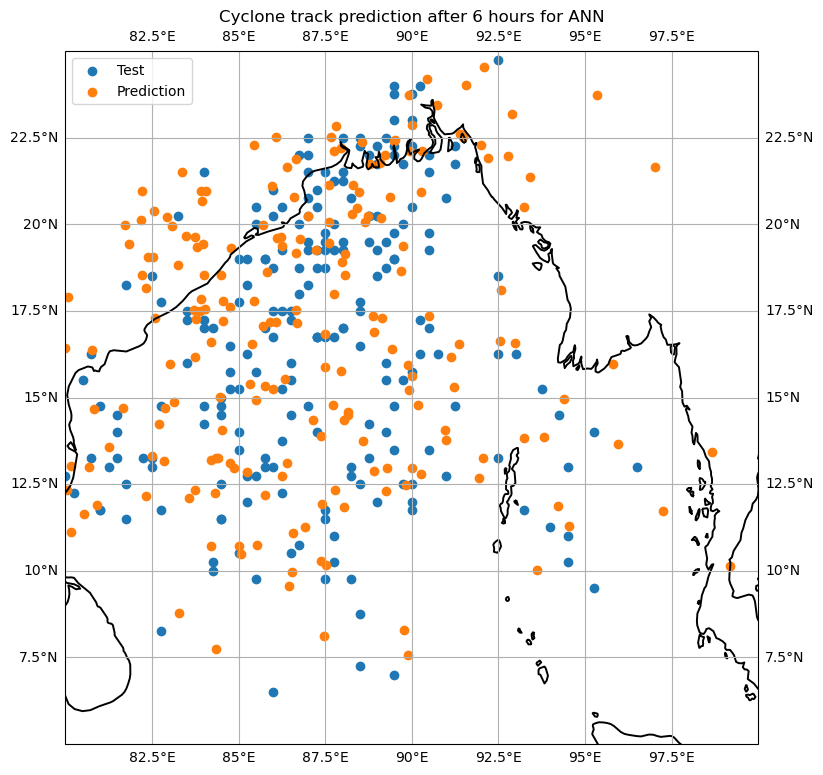

In [17]:
import xarray as xr

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title("Cyclone track prediction after 6 hours for ANN")


plt.scatter(lon_test, lat_test, label='Test')
plt.scatter(lon_pred, lat_pred, label='Prediction')

ax.coastlines(linewidth=1.4)
ax.gridlines(draw_labels=True)
ax.set_extent([80, 100, 5, 25]) 

plt.legend(loc='upper left')

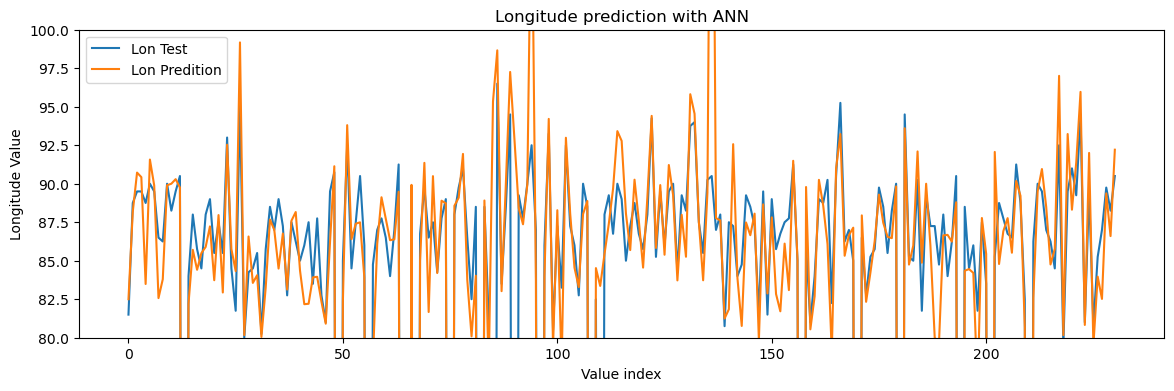

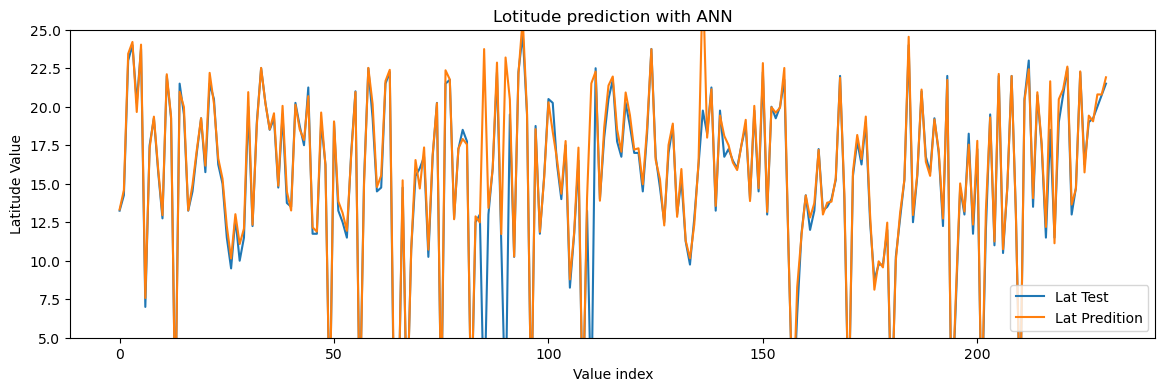

In [18]:
plt.figure(figsize=(14,4))
plt.plot(lon_test, label='Lon Test')
plt.plot(lon_pred, label='Lon Predition')
plt.xlabel('Value index')
plt.ylabel('Longitude Value')
plt.ylim(80,100)
plt.title("Longitude prediction with ANN")
plt.legend()

plt.figure(figsize=(14,4))
plt.plot(lat_test, label='Lat Test')
plt.plot(lat_pred, label='Lat Predition')
plt.xlabel('Value index')
plt.ylabel('Latitude Value')
plt.ylim(5, 25)
plt.title("Latitude prediction with ANN")
plt.legend()

In [19]:
#for single cyclone
dataset[:21]

,index,Hours,lat,lon,min_msl,mean_msl,max_wind,lat+1,lat+2,lat+3,lat+4,lat+5,lon+1,lon+2,lon+3,lon+4,lon+5,lat+6,lon+6
0,1,0,6.75,86.50,99568.80469,100413.9922,17.309776,6.75,6.75,6.75,6.75,6.75,86.25,86.25,86.00,86.00,86.00,6.75,86.00
1,1,6,6.75,86.00,99776.70313,100643.5156,15.157084,6.75,6.75,6.75,6.75,6.75,85.75,86.00,86.00,86.00,86.00,6.50,86.00
2,1,12,6.50,86.00,99329.61719,100238.6250,19.080509,6.25,6.25,6.50,6.50,6.50,86.00,86.00,85.75,86.00,86.00,6.50,86.00
3,1,18,6.50,86.00,99475.76563,100549.6563,18.224230,6.75,6.75,7.00,7.25,7.50,86.00,86.25,86.50,86.50,86.25,7.75,86.25
4,1,24,7.75,86.25,99259.90625,100432.4531,17.803444,7.75,8.00,8.00,8.00,8.25,86.25,86.25,86.25,86.25,86.25,8.50,86.25
5,1,30,8.50,86.25,99227.66406,100669.1797,18.804590,8.50,8.75,8.75,9.00,9.00,86.00,86.00,85.75,85.75,85.75,9.00,85.75
6,1,36,9.00,85.75,98647.60938,100267.5234,21.080534,9.00,9.25,9.25,9.50,9.50,85.50,85.50,85.50,85.50,85.50,9.75,85.50
7,1,42,9.75,85.50,98754.91406,100629.7969,21.584455,9.75,10.00,10.00,10.25,10.25,85.25,85.25,85.00,85.00,85.00,10.50,85.00
8,1,48,10.50,85.00,98312.77344,100489.7266,21.956596,10.75,10.75,11.00,11.25,11.50,85.00,85.00,84.75,84.75,84.75,11.75,84.50
9,1,54,11.75,84.50,98377.00000,100733.2734,22.291151,11.75,12.00,12.00,12.25,12.25,84.25,84.25,84.00,83.75,83.75,12.00,83.50


In [20]:
X_test

array([[-1.127536  , -0.58608063, -0.95285805, ..., -0.17423667,
        -0.07393193, -0.02768701],
       [ 1.01750715, -0.58608063, -0.57671696, ...,  0.30240167,
         0.31391426,  0.32994486],
       [-0.88238821, -0.01124196,  1.49205898, ...,  0.33527328,
         0.35403628,  0.36694127],
       ...,
       [-0.02437095, -1.1609193 ,  1.05322772, ...,  0.35170908,
         0.38078429,  0.39160553],
       [-0.82110126, -0.58608063,  1.05322772, ...,  0.25309425,
         0.28716625,  0.29294846],
       [ 1.14008105, -0.01124196,  1.1159179 , ...,  0.4010165 ,
         0.4075323 ,  0.4162698 ]])